In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
class multiNormal():
    def __init__(self, mean, cov):
        self.mean = mean
        self.cov = cov
    def __add__(self, other):
        if isinstance(other, multiNormal):
            return multiNormal(self.mean + other.mean, self.cov + other.cov)
        else:
            raise TypeError
    def __mul__(self, other):
        if isinstance(other, float):
            return multiNormal(self.mean * other, self.cov * other * other)
        else:
            raise TypeError

In [8]:
y = np.array([i * i + np.random.rand() * i for i in range(100)])
x = np.array([[i + np.random.rand() * i / 10, i + np.random.rand() * i / 10] for i in range(100)])
print(x)

pred_x = np.array(list(map(float, input().split(' '))))
pred_y = 0

centered_x = x - pred_x
cov_matrix = np.dot(centered_x.T, centered_x) / (len(x))

print(cov_matrix)
dist = multivariate_normal(pred_x, cov_matrix)
for index in range(len(x)):
    pred_y += y[index] * dist.pdf(x[index])

print(pred_x)
print(pred_y)


[[  0.           0.        ]
 [  1.04710288   1.05912601]
 [  2.11551544   2.06737855]
 [  3.21027148   3.20346114]
 [  4.2651323    4.04659709]
 [  5.22767221   5.02584734]
 [  6.48555813   6.56688859]
 [  7.23452562   7.16019072]
 [  8.25115732   8.79323891]
 [  9.57511543   9.53251267]
 [ 10.08151061  10.82472341]
 [ 12.00314521  11.28766975]
 [ 12.72869445  13.04099816]
 [ 13.32596949  13.19371075]
 [ 14.24298092  15.31443384]
 [ 16.12673246  15.85793782]
 [ 16.40722261  16.79031454]
 [ 17.25613093  17.31449471]
 [ 19.35468897  18.69594587]
 [ 20.56726445  19.4839178 ]
 [ 21.82034602  21.68957463]
 [ 22.25671063  22.0931793 ]
 [ 23.01027954  23.85525975]
 [ 23.19942709  24.74055741]
 [ 26.25569637  25.56859347]
 [ 25.54222411  25.57423219]
 [ 27.97283329  28.08637351]
 [ 28.47944252  28.1467301 ]
 [ 28.4546789   29.63572704]
 [ 31.04124497  29.85972363]
 [ 30.68256069  31.66245195]
 [ 34.04219673  31.00510839]
 [ 34.15202946  32.0096089 ]
 [ 36.09862522  33.96197189]
 [ 34.30254266

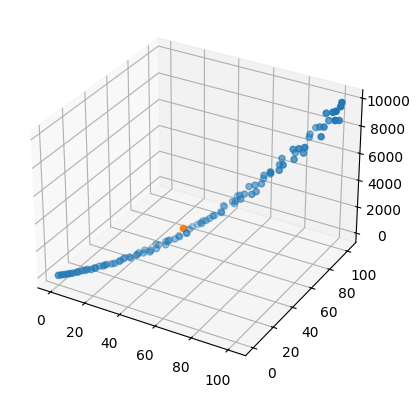

In [9]:
fig, ax = plt.subplots(subplot_kw = {"projection" : "3d"})
ax.scatter(x[:, 0], x[:, 1], y)
ax.scatter(pred_x[0], pred_x[1], pred_y)